## 1. Image processing
In this step, we perform image processing, which is a process of matching multiband imaging data in both spatial resolution (i.e., PSF size) and sampling (i.e., pixel size). Basically, this process includes PSF matching and spatial resampling and reprojection to the multiband images. This image processing can be done using the `piXedfit.piXedfit_images.images_processing` class.

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# calling images_processing class
from piXedfit.piXedfit_images import images_processing

### 1.1. Preparing inputs 

In [3]:
# define a set of filters
filters = ['galex_fuv', 'galex_nuv', 'sdss_u', 'sdss_g', 'sdss_r', 'sdss_i', 
           'sdss_z', '2mass_j', '2mass_h', '2mass_k', 'wise_w1', 'spitzer_irac_36', 
           'spitzer_irac_45', 'wise_w2', 'spitzer_irac_58', 'spitzer_irac_80', 
           'wise_w3', 'wise_w4', 'spitzer_mips_24',  'herschel_pacs_70', 
           'herschel_pacs_160', 'herschel_spire_250', 'herschel_spire_350']

### Science images:
sci_img = {}
sci_img['galex_fuv'] = 'skybgsub_GI3_050006_NGC5194-fd-int.fits'
sci_img['galex_nuv'] = 'skybgsub_GI3_050006_NGC5194-nd-int.fits'
sci_img['sdss_u'] = 'SDSS_mosaic_u.fits'
sci_img['sdss_g'] = 'SDSS_mosaic_g.fits'
sci_img['sdss_r'] = 'SDSS_mosaic_r.fits'
sci_img['sdss_i'] = 'SDSS_mosaic_i.fits'
sci_img['sdss_z'] = 'SDSS_mosaic_z.fits'
sci_img['2mass_j'] = 'm51a_mosaic_j.fits'
sci_img['2mass_h'] = 'm51a_mosaic_h.fits'
sci_img['2mass_k'] = 'm51a_mosaic_k.fits'
sci_img['wise_w1'] = 'skybgsub_wise_w1.fits'
sci_img['spitzer_irac_36'] = 'ngc5194_v7.phot.1.fits'
sci_img['spitzer_irac_45'] = 'ngc5195_v7.phot.2.fits'
sci_img['wise_w2'] = 'skybgsub_wise_w2.fits'
sci_img['spitzer_irac_58'] = 'ngc5195_v7.phot.3.fits'
sci_img['spitzer_irac_80'] = 'ngc5194_v7.phot.4.fits'
sci_img['wise_w3'] = 'skybgsub_wise_w3.fits'
sci_img['wise_w4'] = 'skybgsub_wise_w4.fits'
sci_img['spitzer_mips_24'] = 'ngc5194_mips24_crop_v5-0.fits'
sci_img['herschel_pacs_70'] = 'ngc5194_scanamorphos_pacs70_0_image.fits'
sci_img['herschel_pacs_160'] = 'ngc5194_scanamorphos_pacs160_0_image.fits'
sci_img['herschel_spire_250'] = 'ngc5194-PSWmap_MS-v51-Brigade_image.fits'
sci_img['herschel_spire_350'] = 'ngc5194-PMWmap_MS-v51-Brigade_image.fits'

### Variance images:
var_img = {}
var_img['galex_fuv'] = 'var_skybgsub_GI3_050006_NGC5194-fd-int.fits'
var_img['galex_nuv'] = 'var_skybgsub_GI3_050006_NGC5194-nd-int.fits'
var_img['sdss_u'] = 'sigmasq_SDSS_mosaic_u.fits'
var_img['sdss_g'] = 'sigmasq_SDSS_mosaic_g.fits'
var_img['sdss_r'] = 'sigmasq_SDSS_mosaic_r.fits'
var_img['sdss_i'] = 'sigmasq_SDSS_mosaic_i.fits'
var_img['sdss_z'] = 'sigmasq_SDSS_mosaic_z.fits'
var_img['2mass_j'] = 'var_m51a_mosaic_j.fits'
var_img['2mass_h'] = 'var_m51a_mosaic_h.fits'
var_img['2mass_k'] = 'var_m51a_mosaic_k.fits'
var_img['wise_w1'] = 'var_wise_w1.fits'
var_img['spitzer_irac_36'] = 'var_ngc5194_v7.phot.1.fits'
var_img['spitzer_irac_45'] = 'var_ngc5195_v7.phot.2.fits'
var_img['wise_w2'] = 'var_wise_w2.fits'
var_img['spitzer_irac_58'] = 'var_ngc5195_v7.phot.3.fits'
var_img['spitzer_irac_80'] = 'var_ngc5194_v7.phot.4.fits'
var_img['wise_w3'] = 'var_wise_w3.fits'
var_img['wise_w4'] = 'var_wise_w4.fits'
var_img['spitzer_mips_24'] = 'var_ngc5194_mips24_crop_v5-0.fits'
var_img['herschel_pacs_70'] = 'var_ngc5194_scanamorphos_pacs70_0_error.fits'
var_img['herschel_pacs_160'] = 'var_ngc5194_scanamorphos_pacs160_0_error.fits'
var_img['herschel_spire_250'] = 'var_ngc5194-PSWmap_MS-v51-Brigade_error.fits'
var_img['herschel_spire_350'] = 'var_ngc5194-PMWmap_MS-v51-Brigade_error.fits'

# galaxy's coordinate and redshift
gal_ra = 202.469649065
gal_dec = 47.195225388  
gal_z = 0.001544 

# desired size for the stamp images
stamp_size = [141,141]

### 1.2. Call images_processing class

In [4]:
img_process = images_processing(filters=filters,sci_img=sci_img,var_img=var_img,gal_ra=gal_ra,gal_dec=gal_dec,
                                gal_z=gal_z,stamp_size=stamp_size)

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
INFO: 
             

### Run image processing

In [5]:
output_stamps = img_process.reduced_stamps()

[PSF matching to herschel_spire_350]
[produce crop_skybgsub_GI3_050006_NGC5194-fd-int.fits]
[produce crop_var_skybgsub_GI3_050006_NGC5194-fd-int.fits]
[PSF matching]
[produce psfmatch_crop_skybgsub_GI3_050006_NGC5194-fd-int.fits]
[produce psfmatch_crop_var_skybgsub_GI3_050006_NGC5194-fd-int.fits]
[produce crop_skybgsub_GI3_050006_NGC5194-nd-int.fits]
[produce crop_var_skybgsub_GI3_050006_NGC5194-nd-int.fits]
[PSF matching]
[produce psfmatch_crop_skybgsub_GI3_050006_NGC5194-nd-int.fits]
[produce psfmatch_crop_var_skybgsub_GI3_050006_NGC5194-nd-int.fits]
[produce crop_SDSS_mosaic_u.fits]
[produce crop_sigmasq_SDSS_mosaic_u.fits]
[PSF matching]
[produce psfmatch_crop_SDSS_mosaic_u.fits]
[produce psfmatch_crop_sigmasq_SDSS_mosaic_u.fits]
[produce crop_SDSS_mosaic_g.fits]
[produce crop_sigmasq_SDSS_mosaic_g.fits]
[PSF matching]
[produce psfmatch_crop_SDSS_mosaic_g.fits]
[produce psfmatch_crop_sigmasq_SDSS_mosaic_g.fits]
[produce crop_SDSS_mosaic_r.fits]
[produce crop_sigmasq_SDSS_mosaic_r.f

INFO: 
        Inconsistent SIP distortion information is present in the current WCS:
        SIP coefficients were detected, but CTYPE is missing "-SIP" suffix,
        therefore the current WCS is internally inconsistent.

        Because relax has been set to True, the resulting output WCS will have
        "-SIP" appended to CTYPE in order to make the header internally consistent.

        However, this may produce incorrect astrometry in the output WCS, if
        in fact the current WCS is already distortion-corrected.

        Therefore, if current WCS is already distortion-corrected (eg, drizzled)
        then SIP distortion components should not apply. In that case, for a WCS
        that is already distortion-corrected, please remove the SIP coefficients
        from the header.

         [astropy.wcs.wcs]
[produce crop_var_ngc5195_v7.phot.2.fits]
[PSF matching]
[produce psfmatch_crop_ngc5195_v7.phot.2.fits]
[produce psfmatch_crop_var_ngc5195_v7.phot.2.fits]
[produce crop_sky

[produce crop_var_ngc5194_v7.phot.4.fits]
[PSF matching]
[produce psfmatch_crop_ngc5194_v7.phot.4.fits]
[produce psfmatch_crop_var_ngc5194_v7.phot.4.fits]
[produce crop_skybgsub_wise_w3.fits]
[produce crop_var_wise_w3.fits]
[PSF matching]
[produce psfmatch_crop_skybgsub_wise_w3.fits]
[produce psfmatch_crop_var_wise_w3.fits]
[produce crop_skybgsub_wise_w4.fits]
[produce crop_var_wise_w4.fits]
[PSF matching]
[produce psfmatch_crop_skybgsub_wise_w4.fits]
[produce psfmatch_crop_var_wise_w4.fits]
[produce crop_ngc5194_mips24_crop_v5-0.fits]
[produce crop_var_ngc5194_mips24_crop_v5-0.fits]
[PSF matching]
[produce psfmatch_crop_ngc5194_mips24_crop_v5-0.fits]
[produce psfmatch_crop_var_ngc5194_mips24_crop_v5-0.fits]
[produce crop_ngc5194_scanamorphos_pacs70_0_image.fits]
[produce crop_var_ngc5194_scanamorphos_pacs70_0_error.fits]
[PSF matching]
[produce psfmatch_crop_ngc5194_scanamorphos_pacs70_0_image.fits]
[produce psfmatch_crop_var_ngc5194_scanamorphos_pacs70_0_error.fits]
[produce crop_ngc

[produce stamp_psfmatch_crop_ngc5195_v7.phot.3.fits]
INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

  

### Check results of images processing: stamps of reduced images

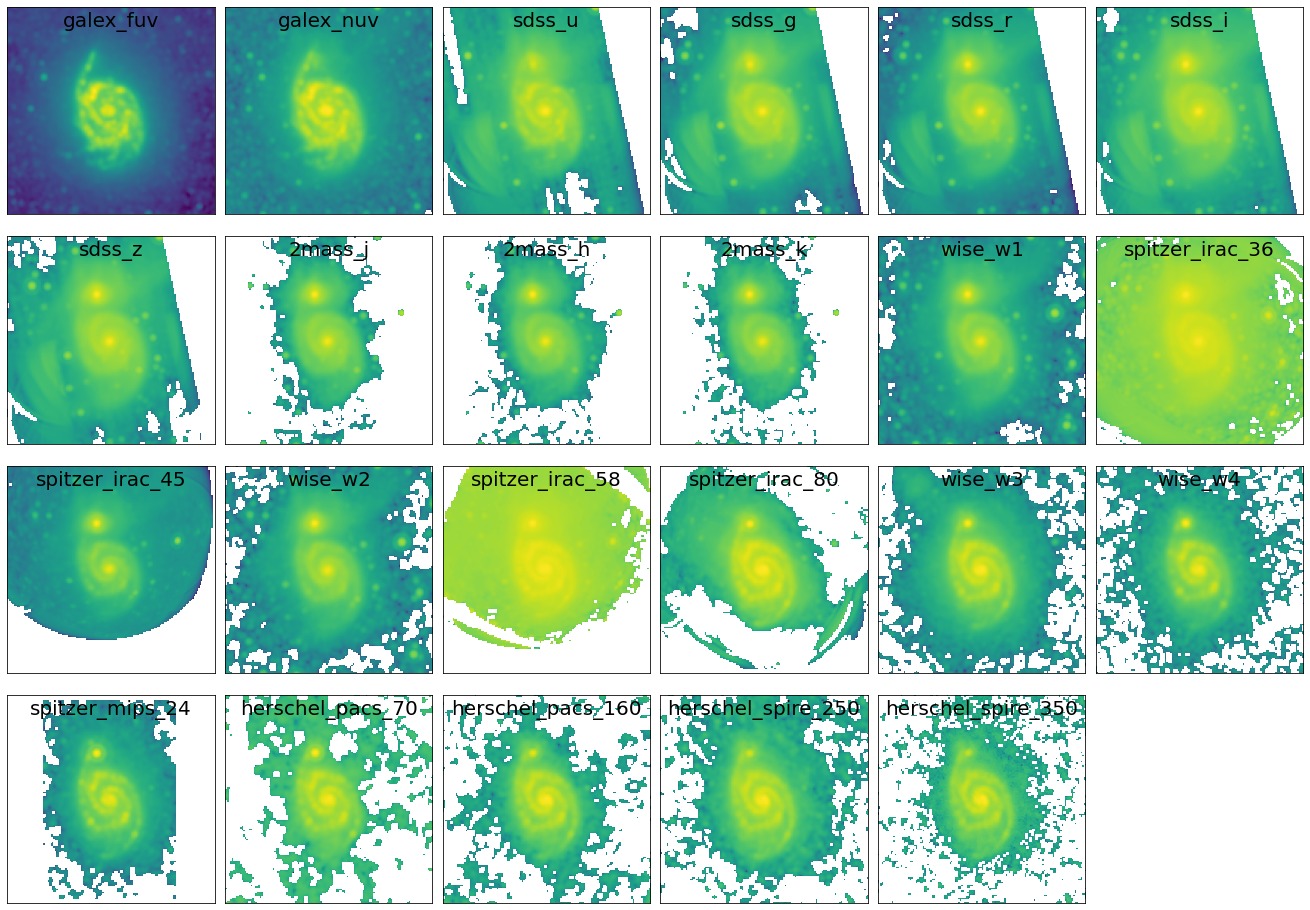

In [6]:
%matplotlib inline

fig1 = plt.figure(figsize=(20,14))

nbands = len(filters)
for bb in range(0,nbands):
    f1 = fig1.add_subplot(4, 6, bb+1)
    plt.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
    str_temp = "name_img_%s" % filters[bb]
    hdu = fits.open(output_stamps[str_temp])
    plt.imshow(np.log10(hdu[0].data), origin='lower')
    f1.text(0.5, 0.93, filters[bb], horizontalalignment='center', 
            verticalalignment='center',transform = f1.transAxes, 
            fontsize=20, color='black')
    hdu.close()

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.05, wspace=0.05)

### 1.3. Define galaxy's region of interest
Basically, user has a freedom to define the galaxy's region of interest (ROI) that will be analyzed further (i.e., SED fitting). The input ROI should be in a 2D array with the same size as that of the stamp images produced after the image processing. In the 2D array, pixels belong to the galaxy should be given value 1 and those not belong to the galaxy should be given value 0.

While it can be freely defined, It's recmmended to use a built-in function in piXedfit for defining the galaxy's region. There are two options provided for this: (1) using segmentation maps, and (2) using elliptical aperture. In this tutorial, we will try the first method.

In [7]:
segm_maps = img_process.segmentation_sep(output_stamps, thresh=3.0, minarea=1000, deblend_nthresh=10, 
                                         deblend_cont=1.0)

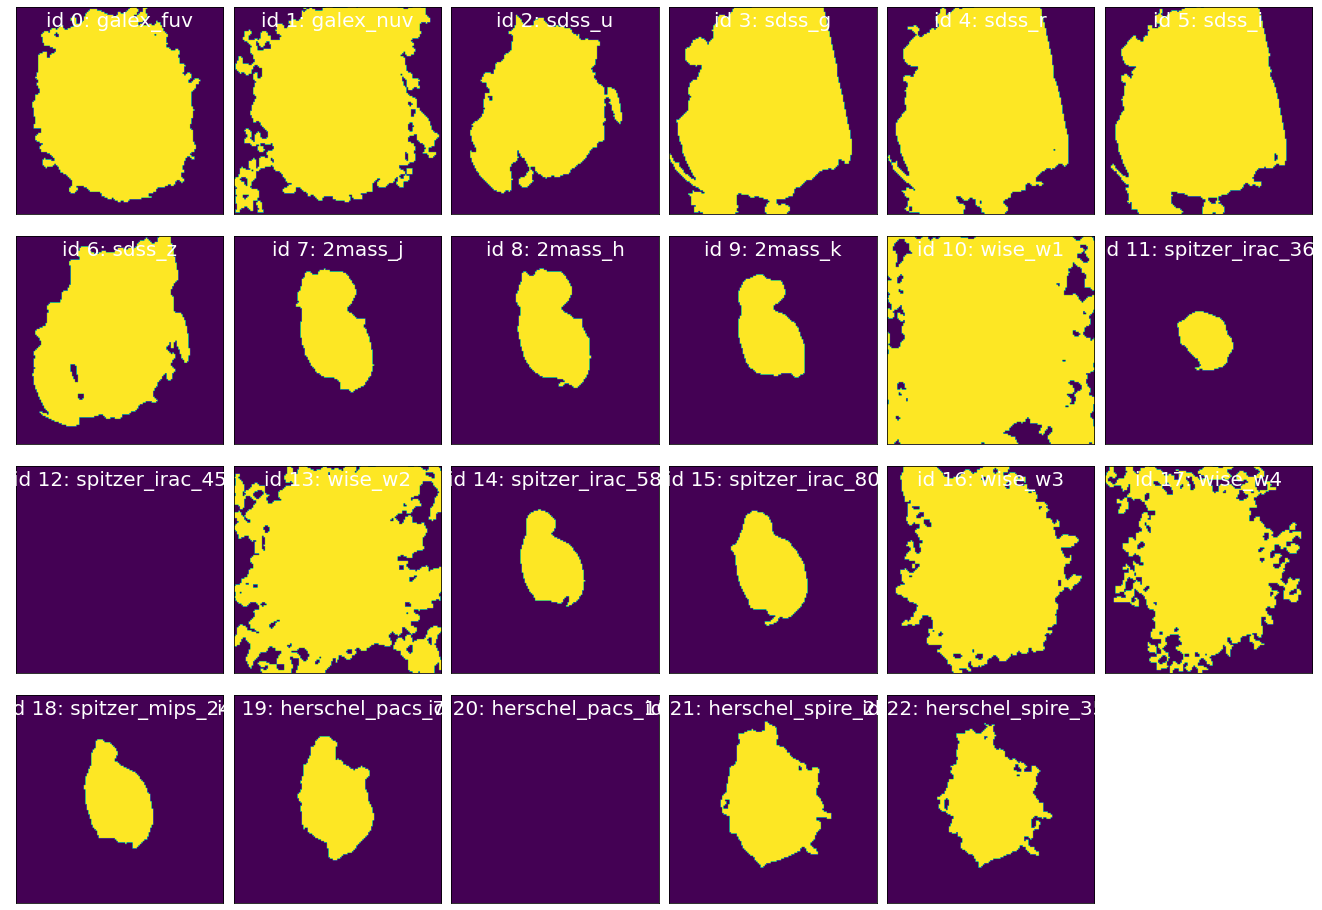

In [8]:
fig1 = plt.figure(figsize=(20,14))

for bb in range(0,nbands):
    f1 = fig1.add_subplot(4, 6, bb+1)
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)
    plt.imshow(segm_maps[bb], origin='lower')
    f1.text(0.5, 0.93, "id %d: %s" % (bb,filters[bb]), horizontalalignment='center', 
            verticalalignment='center',transform = f1.transAxes, 
            fontsize=20, color='white')

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.05, wspace=0.05)

Select segmentation maps that are going too be used and merge them to form a galaxy's ROI. Let's called it `gal_region1`. This can be done using the `galaxy_region` method.

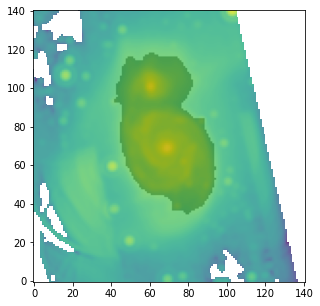

In [9]:
# select segmentation maps
select_ids = [7, 8, 9]
select_segm_maps = []
for ii in select_ids:
    select_segm_maps.append(segm_maps[ii])

gal_region1 = img_process.galaxy_region(segm_maps=select_segm_maps)

# plot
fig1 = plt.figure(figsize=(5,5))
f1 = plt.subplot()

str_temp = "name_img_%s" % filters[3]
hdu = fits.open(output_stamps[str_temp])
data_image = hdu[0].data
hdu.close()
plt.imshow(np.log10(data_image), origin='lower')
    
plt.imshow(gal_region1, origin='lower', cmap='Greys', alpha=0.2)

### 1.4. Calculate E(B-V) attenuation by the foreground Galactic dust 
This value can be estimated using the `EBV_foreground_dust` function. This function retrieve the information from IRSA database through astroquery module. 

In [10]:
from piXedfit.piXedfit_images import EBV_foreground_dust

Gal_EBV = EBV_foreground_dust(gal_ra, gal_dec)

### 1.5. Calculate fluxes of pixels and get photometric data cube
This can be done using the `flux map` method. We need to input galaxy's ROI to this function. For this tutorial, let's use the one we obtained based on the segmentation maps.

In [11]:
name_out_fits = "fluxmap_m51.fits"
mag_zp_2mass = [20.86689949, 20.65309906, 20.04360008]
flux_maps = img_process.flux_map(output_stamps, gal_region1, Gal_EBV=Gal_EBV,mag_zp_2mass=mag_zp_2mass,
                                 name_out_fits=name_out_fits)

### 1.6. Check result of image processing: photometric data cube

In [12]:
hdu = fits.open("fluxmap_m51.fits")
hdu.info()
header = hdu[0].header
print (header)

# get unit of flux in erg/s/cm2/A
unit_flux = float(header['unit'])

# get maps
gal_region = hdu['GALAXY_REGION'].data
flux_map = hdu['FLUX'].data*unit_flux
flux_err_map = hdu['FLUX_ERR'].data*unit_flux
hdu.close()

Filename: fluxmap_m51.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  FLUX          1 PrimaryHDU      44   (141, 141, 23)   float64   
  1  FLUX_ERR      1 ImageHDU         9   (141, 141, 23)   float64   
  2  GALAXY_REGION    1 ImageHDU         8   (141, 141)   float64   
  3  STAMP_IMAGE    1 ImageHDU        57   (141, 141)   float64   
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                  141                                                  NAXIS2  =                  141                                                  NAXIS3  =                   23                                                  EXTEND  =                    T                                                  NFILTERS=                   23                                             

Get central wavelengths of the filters to be used for plotting SEDs of pixels. This can be obtained using `piXedfit.utils.filtering.cwave_filters` function.

In [13]:
from piXedfit.utils.filtering import cwave_filters

photo_wave = cwave_filters(filters)

### 1.6.1. Plot maps of fluxes and flux uncertainties

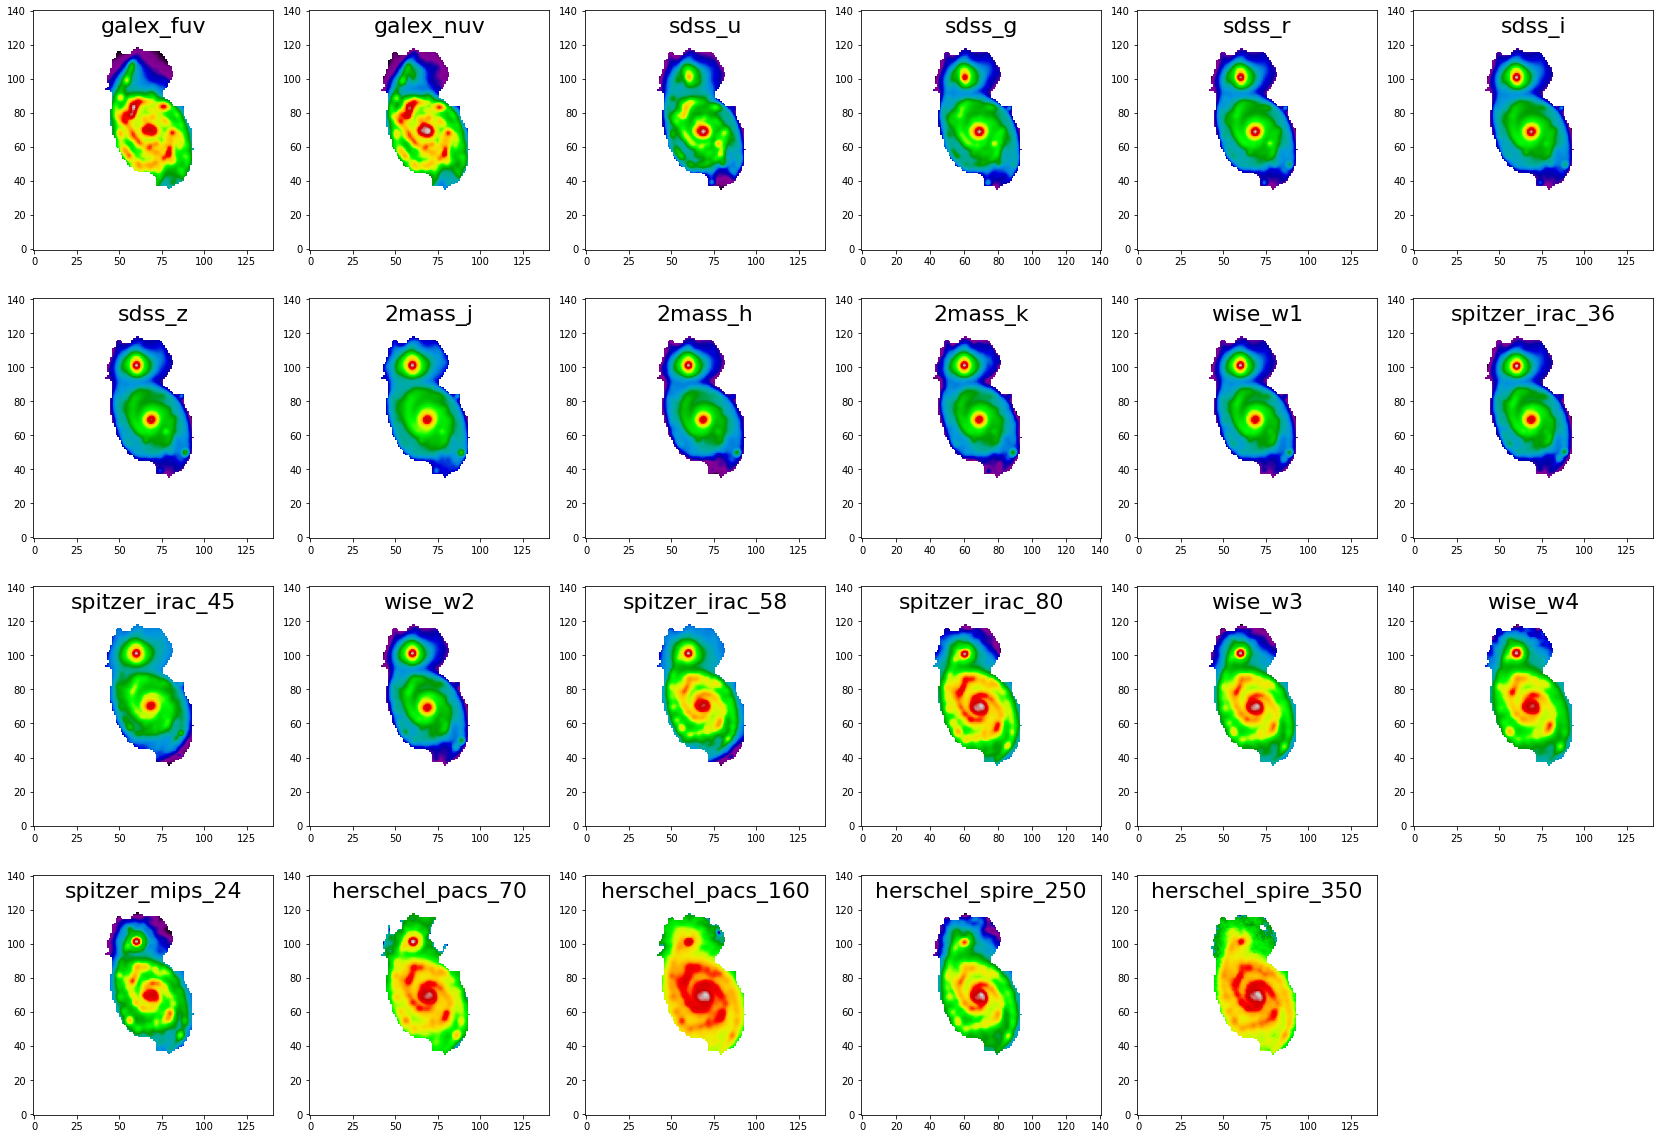

In [14]:
# number of filters:
nbands = len(filters)

# plotting
fig1 = plt.figure(figsize=(25,20))
for ii in range(0,nbands):
    f1 = fig1.add_subplot(4, 6, ii+1)
    im = plt.imshow(np.log10(flux_map[ii]), origin='lower', cmap='nipy_spectral')
    f1.text(0.5, 0.93, '%s' % filters[ii], horizontalalignment='center', verticalalignment='center',
            transform = f1.transAxes, fontsize=22, color='black')
    
#cax = fig1.add_axes([0.3, 0.83, 0.4, 0.04])
#cb = fig1.colorbar(im, cax=cax, orientation="horizontal")
#cb.ax.tick_params(labelsize=14)
#cax.xaxis.set_ticks_position("top")
#cax.xaxis.set_label_position("top")
#cb.set_label(r'log(Flux [erg $\rm{ s}^{-1}\rm{cm}^{-2}\AA^{-1}$])', fontsize=24)
#cb.ax.tick_params(labelsize=15)

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.85, hspace=0.005, wspace=0.15)
plt.show()

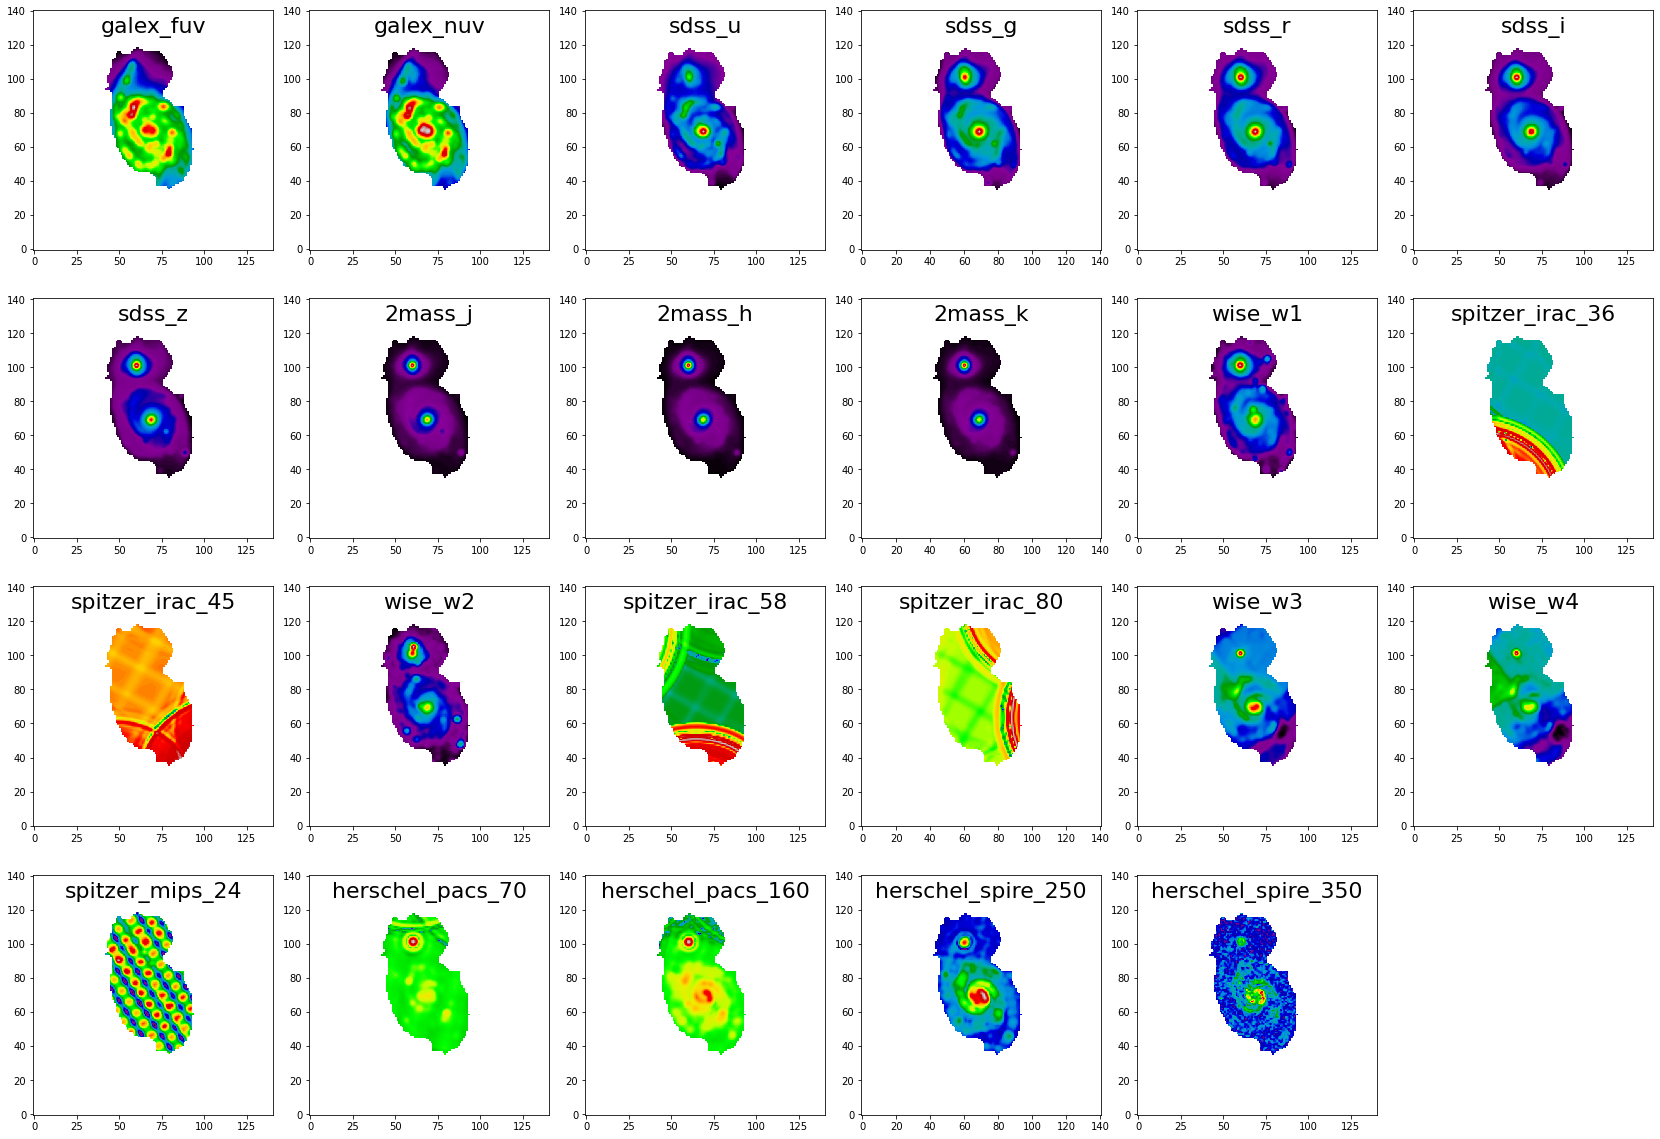

In [15]:
# number of filters:
nbands = len(filters)

# plotting
fig1 = plt.figure(figsize=(25,20))
for ii in range(0,nbands):
    f1 = fig1.add_subplot(4, 6, ii+1)
    im = plt.imshow(np.log10(flux_err_map[ii]), origin='lower', cmap='nipy_spectral')
    f1.text(0.5, 0.93, '%s' % filters[ii], horizontalalignment='center', verticalalignment='center',
            transform = f1.transAxes, fontsize=22, color='black')
    
#cax = fig1.add_axes([0.3, 0.83, 0.4, 0.04])
#cb = fig1.colorbar(im, cax=cax, orientation="horizontal")
#cb.ax.tick_params(labelsize=14)
#cax.xaxis.set_ticks_position("top")
#cax.xaxis.set_label_position("top")
#cb.set_label(r'log(Flux [erg $\rm{ s}^{-1}\rm{cm}^{-2}\AA^{-1}$])', fontsize=24)
#cb.ax.tick_params(labelsize=15)

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.85, hspace=0.005, wspace=0.15)
plt.show()

### 1.6.2. Check SEDs of some pixels

In [16]:
## transpose from (band,y,x) => (y,x,band):
pix_SED_flux = np.transpose(flux_map, axes=(1,2,0))
pix_SED_flux_err = np.transpose(flux_err_map, axes=(1,2,0))

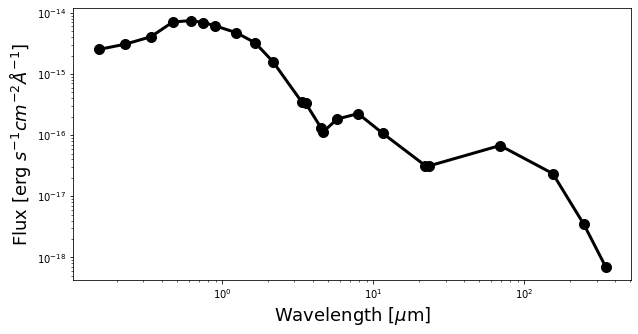

In [17]:
fig1 = plt.figure(figsize=(10,5))
f1 = plt.subplot()
f1.set_yscale('log')
f1.set_xscale('log')
plt.xlabel(r"Wavelength [$\mu$m]", fontsize=18)
plt.ylabel(r"Flux [erg $s^{-1}cm^{-2}\AA^{-1}$]", fontsize=18)

# pixel's coordinate
pos_y = 70
pos_x = 70

plt.errorbar(photo_wave/1e+4, pix_SED_flux[pos_y][pos_x], yerr=pix_SED_flux_err[pos_y][pos_x], 
                 fmt='-o', markersize=10, lw=3, color='black')
plt.show()

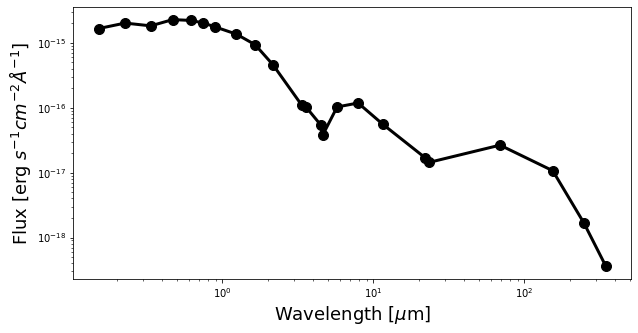

In [18]:
fig1 = plt.figure(figsize=(10,5))
f1 = plt.subplot()
f1.set_yscale('log')
f1.set_xscale('log')
plt.xlabel(r"Wavelength [$\mu$m]", fontsize=18)
plt.ylabel(r"Flux [erg $s^{-1}cm^{-2}\AA^{-1}$]", fontsize=18)

# pixel's coordinate
pos_y = 73
pos_x = 67

plt.errorbar(photo_wave/1e+4, pix_SED_flux[pos_y][pos_x], yerr=pix_SED_flux_err[pos_y][pos_x], 
                 fmt='-o', markersize=10, lw=3, color='black')
plt.show()

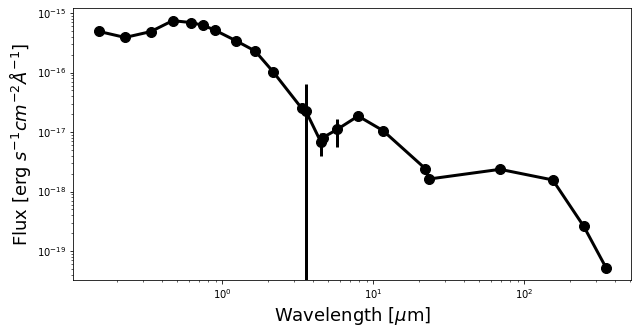

In [19]:
fig1 = plt.figure(figsize=(10,5))
f1 = plt.subplot()
f1.set_yscale('log')
f1.set_xscale('log')
plt.xlabel(r"Wavelength [$\mu$m]", fontsize=18)
plt.ylabel(r"Flux [erg $s^{-1}cm^{-2}\AA^{-1}$]", fontsize=18)

# pixel's coordinate
pos_y = 60
pos_x = 60

plt.errorbar(photo_wave/1e+4, pix_SED_flux[pos_y][pos_x], yerr=pix_SED_flux_err[pos_y][pos_x], 
                 fmt='-o', markersize=10, lw=3, color='black')
plt.show()

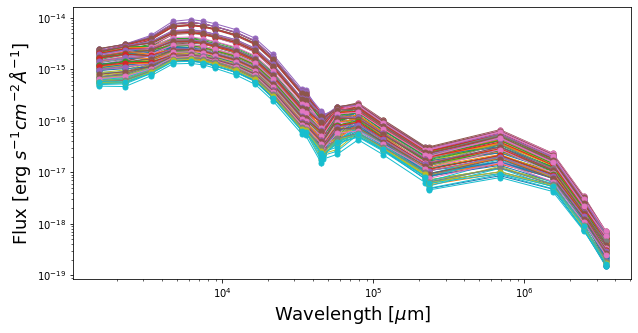

In [20]:
fig1 = plt.figure(figsize=(10,5))
f1 = plt.subplot()

f1.set_yscale('log')
f1.set_xscale('log')
plt.xlabel(r"Wavelength [$\mu$m]", fontsize=18)
plt.ylabel(r"Flux [erg $s^{-1}cm^{-2}\AA^{-1}$]", fontsize=18)

for yy in range(65,75):
    for xx in range(65,75):
        pos_y = yy
        pos_x = xx
        plt.errorbar(photo_wave, pix_SED_flux[pos_y][pos_x], yerr=pix_SED_flux_err[pos_y][pos_x], 
                         fmt='-o', markersize=5, lw=1)

plt.show()